# Drug Risk Analysis

Analysis of the Drug Risk Dataset

In [103]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

%matplotlib inline

In [56]:
df = pd.read_excel('Drug_Risk.xls')

In [57]:
df.columns = [c.lower() for c in df.columns]

In [58]:
df.tail()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


Semeron is a made up substance to test if Participants are exxagerating their consumption.
There a 8 participants that claimed to use Semeron. They can be filtered out since their other replies are not reliable either.
Notice that six of them are between 18 and 24 years old.

In [59]:
df[df.semer != 'CL0']

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [60]:
df = df[df.semer == 'CL0']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1877 non-null   int64  
 1   age        1877 non-null   float64
 2   gender     1877 non-null   float64
 3   education  1877 non-null   float64
 4   country    1877 non-null   float64
 5   ethnicity  1877 non-null   float64
 6   nscore     1877 non-null   float64
 7   escore     1877 non-null   float64
 8   oscore     1877 non-null   float64
 9   ascore     1877 non-null   float64
 10  cscore     1877 non-null   float64
 11  impulsive  1877 non-null   float64
 12  ss         1877 non-null   float64
 13  alcohol    1877 non-null   object 
 14  amphet     1877 non-null   object 
 15  amyl       1877 non-null   object 
 16  benzos     1877 non-null   object 
 17  caff       1877 non-null   object 
 18  cannabis   1877 non-null   object 
 19  choc       1877 non-null   object 
 20  coke    

In [83]:
dict_age = {'-0.95197': '18-24','-0.07854': '25-34', '0.49788': '35-44','1.09449': '45-54','1.82213': '55-64',
            '2.59171': '65+'}

dict_sex = {'0.48246':'Female','-0.48246': 'Male'}

dict_edu = {'-2.43591': 'left_school','-1.7379': 'left_school','-1.43719': 'left_school_at_17_years',
           '-1.22751': 'left_school_at_18 years','-0.61113': 'Some college or university, no certificate or degree',
           '-0.05921': 'professional_certificate/ diploma', '0.45468': 'university_degree',
           '1.16365': 'masters_degree', '1.98437': 'doctorate_degree'}

dict_cou = {'-0.09765': 'Australia', '0.24923': 'Canada', '-0.46841': 'New Zealand', '-0.28519': 'Other',
            '0.21128': 'Republic of Ireland','0.96082': 'UK','-0.57009': 'USA'}

dict_eth = {'-0.50212':'Asian','-1.10702': 'Black','1.90725': 'Mixed-Black/Asian',
            '0.126': 'Mixed-White/Asian','-0.22166' :'Mixed-White/Black','0.1144': 'Other'
            ,'-0.31685': 'White'}

In [84]:
df.age = [dict_age[str(a)] for a in df.age]
df.gender = [dict_sex[str(a)]  for a in df.gender]
df.education = [dict_edu[str(a)] for a in df.education]
df.country = [dict_cou[str(a)] for a in df.country]
df.ethnicity = [dict_eth[str(a)] for a in df.ethnicity]

In [113]:
drugs = ['alcohol',
       'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'shrooms',
       'nicotine', 'semer', 'vsa']

for d in drugs:
    df[d + '_user'] = [u in ('CL4', 'CL5', 'CL6') for u in df[d]]

In [114]:
for d in drugs:
    df[d] = [int(c[-1:]) for c in df[d]]

Semeron is not real and used for checking if a participant exxagerates his drug habits. It can be dropped.

In [115]:
drugs.remove('semer')

## Connection between substances

When using one substace, how likely is it to use another? Which substances are used by the same person?

In [87]:
def plot_networkx_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = list(map(int, nx.get_node_attributes(G, 'size').values())) , alpha = 0.5)
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.savefig('graphs/Drug_Correlations.png')
    plt.show()

In [88]:
G = nx.Graph()

G.add_nodes_from([(drug,dict(size =str(df[drug + '_user'][df[drug + '_user']].count()))) for drug in drugs])
weights = {}
for _, p in df.iterrows():
    for c, b in itertools.combinations(drugs, 2):
        weights[c + '_' + b] = sum(df[f'{c}_user'][df[f'{b}_user']])

G.add_weighted_edges_from([(key.split('_')[0], key.split('_')[1], weights[key]) for key in weights.keys()])


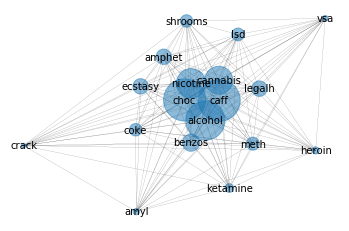

In [89]:
plot_networkx_graph(G)

Can it be improved? The weight should reflect how strongly the use of one drug correlates with the other. So what rate of the cannabis user also drink coffee and what percentage of coffee drinkers also use cannabis? Calculate the mean of that and use it as weight.

In [90]:
adjusted_weights = {}
for key in weights.keys():
    adjusted_weights[key] = weights[key]*(
        (1/df[key.split('_')[0] + '_user'][df[key.split('_')[0] + '_user']].count()) # 1/number of users of first part of key
        +(1/df[key.split('_')[1] + '_user'][df[key.split('_')[1] + '_user']].count())) # 1/number of users of second part of key
    
G.add_weighted_edges_from([(key.split('_')[0], key.split('_')[1], adjusted_weights[key]) for key in adjusted_weights.keys()])   

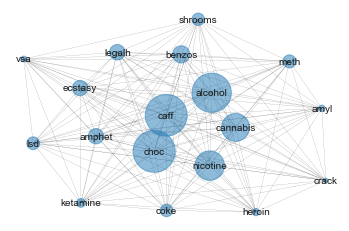

In [105]:
plot_networkx_graph(G)

In [18]:
df.cannabis_user[df['cannabis_user']].count()

788

## How does the age influence substance use?

In [118]:
df.groupby(['age'])

In [100]:
list(range(len(dict_age)))

[0, 1, 2, 3, 4, 5]

In [122]:
sns.set()
l = ['age', *(d + '_user' for d in drugs)]
df[drugs] = df[drugs].astype(int)
df[l].set_index('age').T.plot(kind = 'bar', stacked = True)

TypeError: no numeric data to plot

In [120]:
fig, ax = plt.subplots(figsize=(10,7))  

margin_bottom = np.zeros(len(df['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, d in enumerate(drugs):
    values = list(df[df[] == d].loc[:, 'Value'])

    df[df['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

['age',
 'alcohol_user',
 'amphet_user',
 'amyl_user',
 'benzos_user',
 'caff_user',
 'cannabis_user',
 'choc_user',
 'coke_user',
 'crack_user',
 'ecstasy_user',
 'heroin_user',
 'ketamine_user',
 'legalh_user',
 'lsd_user',
 'meth_user',
 'shrooms_user',
 'nicotine_user',
 'vsa_user']